### 다항회귀 (Polynomial Regression)


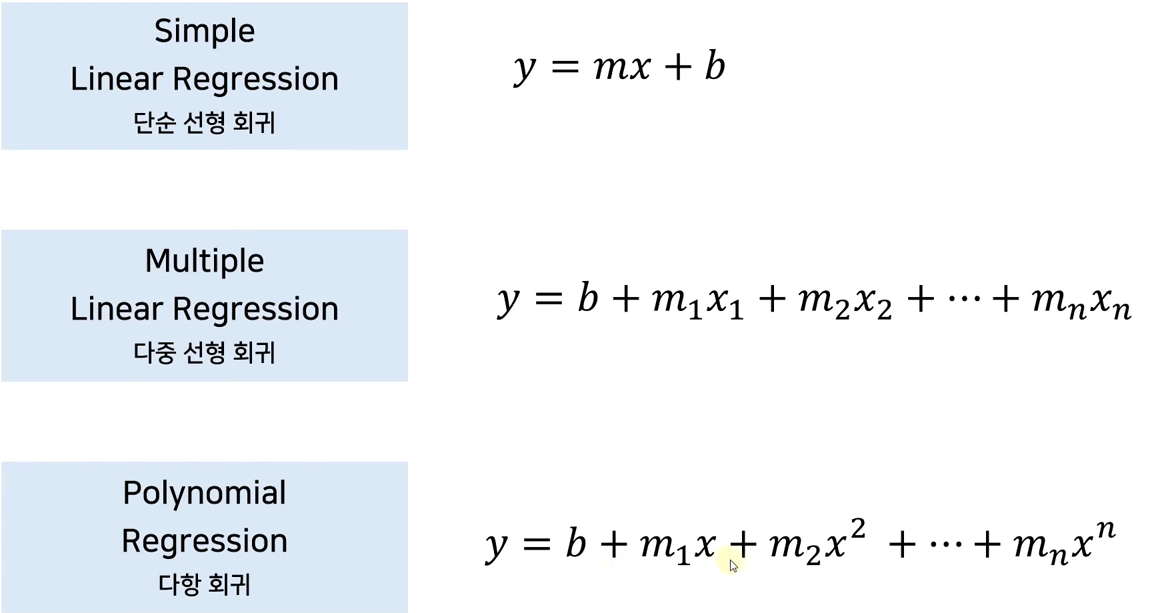

구글에 검색 polynomial regression data fit
arachnoid.com
에서 
degree 를 적게 하면 과소적합 <br>
학습데이터에만 잘 학습하면 과대적합

### 공부시간에 따른 시험점수(우등생)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
#독립변수
X = dataset.iloc[:,:-1].values # row는 전부, column은 마지막꺼 하나빼고 다
#종속변수
y = dataset.iloc[:,-1].values # row는 전부, column은 마지막꺼 하나만


### 단순선형회귀(Simple Linear Regression)

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

#### 데이터 시각화

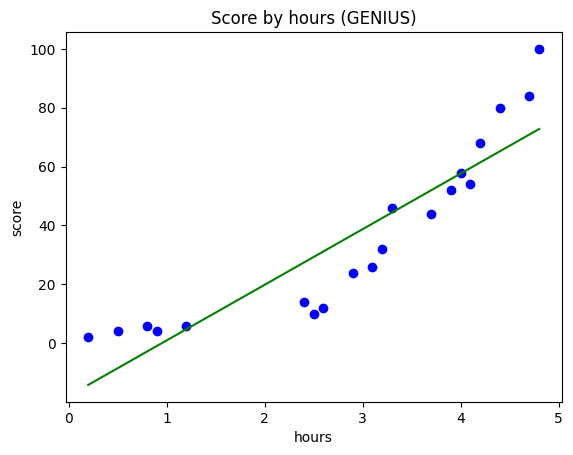

In [5]:
plt.scatter(X,y,color = "blue") #산점도
plt.plot(X, reg.predict(X), color = 'green') #선 그래프
plt.title("Score by hours (GENIUS)") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

In [6]:
reg.score(X,y)

0.8169296513411765

### 다항회귀(Polynomial Regression)
따로 클래스 제공하지 않아
따라서 피처를 다항식에 맞게 바꾸고 적용

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 4차
X_poly = poly_reg.fit_transform(X)
# poly_reg.fit()
# poly_reg.transform(X)
X_poly[:5] # [X]->[X^0,X^1,X^2] ->X가 3이라면 [1,3,9]로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [22]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) #변환된 X와 y를 가지고 모델 생성

LinearRegression()

### 데이터 시각화

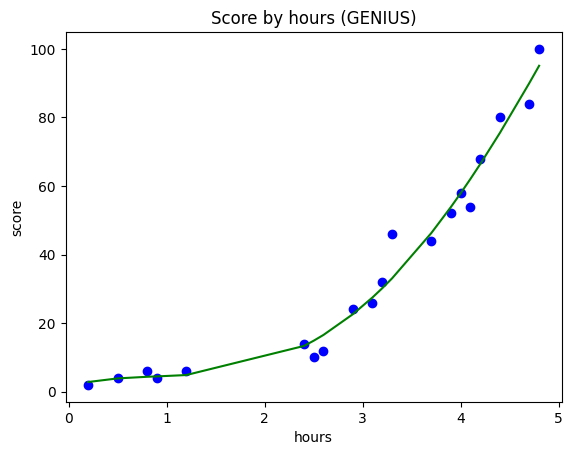

In [24]:
plt.scatter(X,y,color = "blue") #산점도
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'green') #선 그래프
# 다항식에 맞게 변환 시킨후 predict에 넣어줘야해
plt.title("Score by hours (GENIUS)") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

In [25]:
X_range = np.arange(min(X),max(X), 0.1) #X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [26]:
X_range = X_range.reshape(-1,1) # (row 갯수, col 갯수)

In [19]:
X_range

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7]])

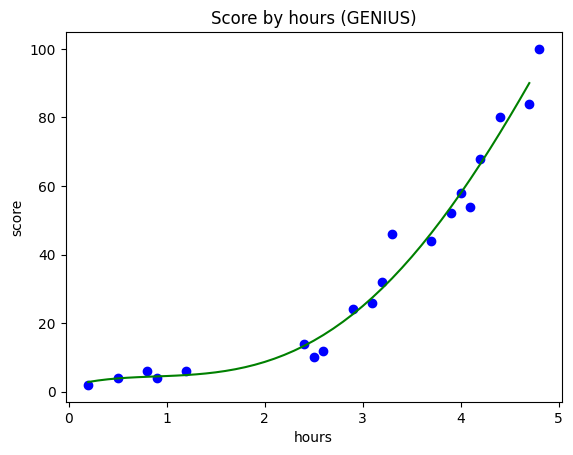

In [27]:
plt.scatter(X,y,color = "blue") #산점도
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color = 'green') #선 그래프
# 다항식에 맞게 변환 시킨후 predict에 넣어줘야해
plt.title("Score by hours (GENIUS)") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [28]:
reg.predict([[2]]) # 2시간 공부했을 때 선형 회귀 모델

array([19.85348988])

In [30]:
lin_reg.predict(poly_reg.fit_transform([[2]]))

array([8.70559135])

In [31]:
lin_reg.score(X_poly, y)

0.9782775579000045